# HW 2: Data frames and data visualization

In [1]:
using CSV # for reading in CSV files as DataFrames
using DataFrames
using PyPlot # for plotting

In [2]:
# (optional) change the style. see styles here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("bmh")                                    
                                                                                  
# (optional) change settings for all plots at once, e.g. I like larger font size                           
rcParams = PyPlot.PyDict(PyPlot.matplotlib.rcParams)                           
rcParams["font.size"] = 16

# (optional) change the max width of columns of `DataFrame`
#  that are displayed in the Juptyer Notebook.
ENV["COLUMNS"] = 300 # characters

300

## 1 Automobiles

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f0/Ford_Pinto.jpg" width=250>

### 1.1 Read in the CSV file `automobiles.csv` ([source of data](https://archive.ics.uci.edu/ml/datasets/automobile)). The names of the columns are not in the `.csv` file but are described [here](http://mlr.cs.umass.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names). For your convenience, I made an array of the column names below.

In [3]:
col_names = [:mpg, :cylinders, :displacement, :horsepower, :weight, :acceleration, :model_year, :origin, :car_name]

9-element Array{Symbol,1}:
 :mpg         
 :cylinders   
 :displacement
 :horsepower  
 :weight      
 :acceleration
 :model_year  
 :origin      
 :car_name    

In [32]:
df_autos = CSV.read("automobiles.csv", header=col_names, copycols=true)
first(df_autos, 10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
,Float64,Int64,Float64,Float64⍰,Float64,Float64,Int64,Int64,String
1,18.0,8,307.0,130.0,3504.0,12.0,70,1,"chevrolet,chevelle,malibu"
2,15.0,8,350.0,165.0,3693.0,11.5,70,1,"buick,skylark,320"
3,18.0,8,318.0,150.0,3436.0,11.0,70,1,"plymouth,satellite"
4,16.0,8,304.0,150.0,3433.0,12.0,70,1,"amc,rebel,sst"
5,17.0,8,302.0,140.0,3449.0,10.5,70,1,"ford,torino"
6,15.0,8,429.0,198.0,4341.0,10.0,70,1,"ford,galaxie,500"
7,14.0,8,454.0,220.0,4354.0,9.0,70,1,"chevrolet,impala"
8,14.0,8,440.0,215.0,4312.0,8.5,70,1,"plymouth,fury,iii"
9,14.0,8,455.0,225.0,4425.0,10.0,70,1,"pontiac,catalina"


### 1.2 How many automobiles are there in the data set?

In [33]:
n_autos = nrow(df_autos)
println("There are $n_autos automobiles in the dataset")

There are 398 automobiles in the dataset


### 1.3 The `:horsepower` column has a `?` associated with it in the display, indicating that it has `missing `values. How many automobiles are missing information about their horsepower?

In [34]:
n_missing_hp = 0
for i = 1:n_autos
    if ismissing(df_autos[i, :horsepower]) == 1
        n_missing_hp += 1
    end
end

println("There are $n_missing_hp automobiles missing information about their horsepower")

There are 6 automobiles missing information about their horsepower


### 1.4 Drop the rows from the `DataFrame` that contain a `missing` attribute

In [35]:
dropmissing!(df_autos, :horsepower)
first(df_autos, 10)

n_autos = nrow(df_autos)

392

### 1.5 Make a scatter plot of the data such that:

* each point represents an automobile
* x-axis is horsepower
* y-axis is mpg (miles per gallon)
* color of point is used to illustrate acceleration
* a colorbar shows how the scale is depicted
* the colorbar, x-axis, and y-axis are labeled.

In [65]:
max_accel = maximum(df_autos[:, :acceleration])

YlGnBu_colormap = PyPlot.matplotlib.cm.get_cmap("YlGnBu")
accel_colors = YlGnBu_colormap.(range(0.0, stop=max_accel, length=n_autos))

392-element Array{NTuple{4,Float64},1}:
 (1.0, 1.0, 0.8509803921568627, 1.0)                                 
 (0.9645674740484429, 0.9862206843521722, 0.772241445597847, 1.0)    
 (0.9288273740868896, 0.972318339100346, 0.6941637831603229, 1.0)    
 (0.8540253748558247, 0.9427912341407151, 0.7000692041522492, 1.0)   
 (0.7781776239907728, 0.9128642829680892, 0.7060976547481739, 1.0)   
 (0.6275893886966551, 0.8543021914648212, 0.7207381776239907, 1.0)   
 (0.4875509419454056, 0.8000307574009996, 0.7348558246828143, 1.0)   
 (0.3655055747789312, 0.7547558631295656, 0.7525720876585928, 1.0)   
 (0.24825836216839675, 0.7068973471741637, 0.7678892733564014, 1.0)  
 (0.1729642445213379, 0.6295117262591311, 0.759523260284506, 1.0)    
 (0.11534025374855825, 0.552156862745098, 0.7451903114186851, 1.0)   
 (0.12518262206843522, 0.45176470588235296, 0.6979469434832757, 1.0) 
 (0.13434832756632065, 0.3544175317185698, 0.6520569011918493, 1.0)  
 ⋮                                                

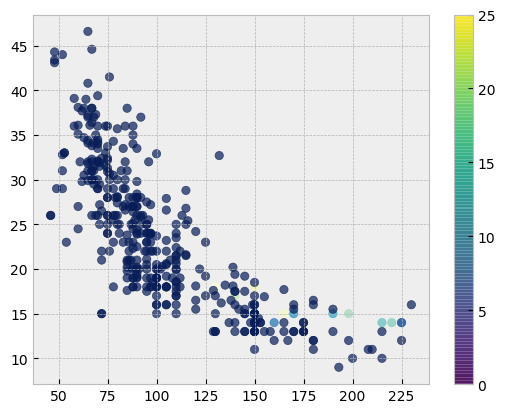

In [68]:
figure()
scatter(df_autos[:, :horsepower], df_autos[:, :mpg], color=accel_colors, alpha=0.7)
colorbar()
clim(0.0, 25.0)

### 1.6 Remove from the `DataFrame` all automobiles that are not Fords. All Ford automobiles contain the string "ford" in the `:car_name` column. The function `occursin` will be useful here.

```julia
occursin("ford", "i love ford pintos") # true
occursin("ford", "i love subarus") # false
```

### 1.7 Of the Ford automobiles, how many unique numbers of cylinders are there?

### 1.8 Make a scatter plot for all Ford automobiles such that:

* each point represents an automobile
* x-axis is horsepower
* y-axis is mpg (miles per gallon)
* x-axis, and y-axis are labeled.
* title is "Fords"
* automobiles with different numbers of cylinders are depicted by different markers and different colors, and automobiles with the same number of cylinders share the same marker and color. for example:
    * 4 cylinders, use `marker="o"` and `color="C0"`
    * 6 cylinders, use `marker="s"` and `color="C1"`
    * 8 cylinders, use `marker="+"` and `color="C2"`
    I suggest a `Dict` to map the number of cylinders to a marker.
* a legend depicts the symbol and color for each number of cylinders

## 2 Ramen


<img src="https://upload.wikimedia.org/wikipedia/commons/f/fc/Soy_ramen.jpg" width=200>

see `ramen-ratings.csv`.

> "The Ramen Rater is a product review website for the hardcore ramen enthusiast, with over 2500 reviews to date. Each record in the dataset is a single ramen product review. Review numbers are contiguous: more recently reviewed ramen varieties have higher numbers. Brand, Variety (the product name), Country, and Style (Cup? Bowl? Tray?) are pretty self-explanatory. Stars indicate the ramen quality, as assessed by the reviewer, on a 5-point scale; this is the most important column in the dataset!"

The `:top_ten` ramen attribute is `missing` if the ramen never placed in the top ten; if it is not `missing`, the `:top_ten` attribute gives us the year it placed in the top ten and its place.

source: [Kaggle](https://www.kaggle.com/residentmario/ramen-ratings/data)

### 2.1 Read in `ramen-ratings.csv` as a `DataFrame`, `df`. display only the first six rows.

In [ ]:
df = # ...

### 2.2 How many ratings are in the data set?

### 2.3 Oddly, the `:stars` column appears as an array of `String`s!

This is because `"Unrated"` appears as the `:stars` attribute in a few rows and prevents `CSV.jl` from reading in the `:stars` column as all `Float64`s.

`filter!` out the rows of the `DataFrame` that have `"Unrated"` as the `:stars` attribute.

### 2.4 The `:stars` column still appears as `String`s. Convert it to `Float64`s by using `parse`, which works as follows:

```julia
parse(Float64, "3.76") # get 3.76 as a Float64
```

You can do this to the entire column vector by preceding with `.`:

```julia
df[!, :stars] = parse.(Float64, df[:, :stars])
```

### 2.5 What is the highest rated variety of ramen that satisfies the following attributes: 
* "Nissin" brand
* mentions "Beef" in the variety
* "Pack" style

### 2.6 Ramen from how many different countries is rated?

### 2.7 Use `by` to:
* split the `DataFrame` into groups, partitioned by `:country`
* apply a function to a column that counts the number of rows
* combine the result into one `DataFrame` with a new column `:nb_ratings`

i.e., use `by` to create a new `DataFrame`, `df_by_country`:

```
:country :nb_ratings
Japan    352
USA      324
...
```

You should indeed see that 352 ramens from Japan were rated and 324 ramens from the USA were rated.

### 2.8 `sort!` the rows in `df_by_country` from (6) by the number of ratings for ramens from that country *from most to least*

### 2.9 Using `df_by_country`, construct a bar plot depicting the number of ratings of ramen from each country:
* one bar for each country
* height of the bar is the number of ratings ramen from that country received
* the countries appear on the bar plot in order of the number of ratings received
* replace numeric x-tick labels on the bar plot with the name of each country. to see the labels, you will need to make the labels run vertically via passing `rotation=90` to `xticks()`

### 2.10 Now let's see where the top ten ramens tend to come from.
create a new `DataFrame`, `df_top_ten`, by dropping all rows that have a `missing` value in `:top_ten`. (we're no longer using our `df_by_country` from above) the `filter` function will be useful.

### 2.11 Use `by` to count the number of top ten ramens from each country and make a bar plot showing where the top ten ramens come from. this is just like in (8), except for top ten ramens only. to distinguish from the bar plot in (8):
* use a different color for the bars
* put a title on the plot "top ten ramens" 

### 2.12 Singapore, Japan, Malaysia, and South Korea have a lot of ramens in the top ten. let's compare the ratings that ramen from these four countries received. first, `filter!` out of the ratings `DataFrame`, `df` (with all of the ramens, even if not in the top ten), all ramens that are not from these four countries.

### 2.13 Use `groupby` to group your `filter`'d `DataFrame` from question (12) by country, loop through the (four) groups (of countries), and plot histograms of the ratings for ramen from each country on the same plot with four panels that have a shared x- and y-axis. I included some skeleton code below. See `subplots` [here](https://matplotlib.org/3.1.1/gallery/statistics/hist.html).

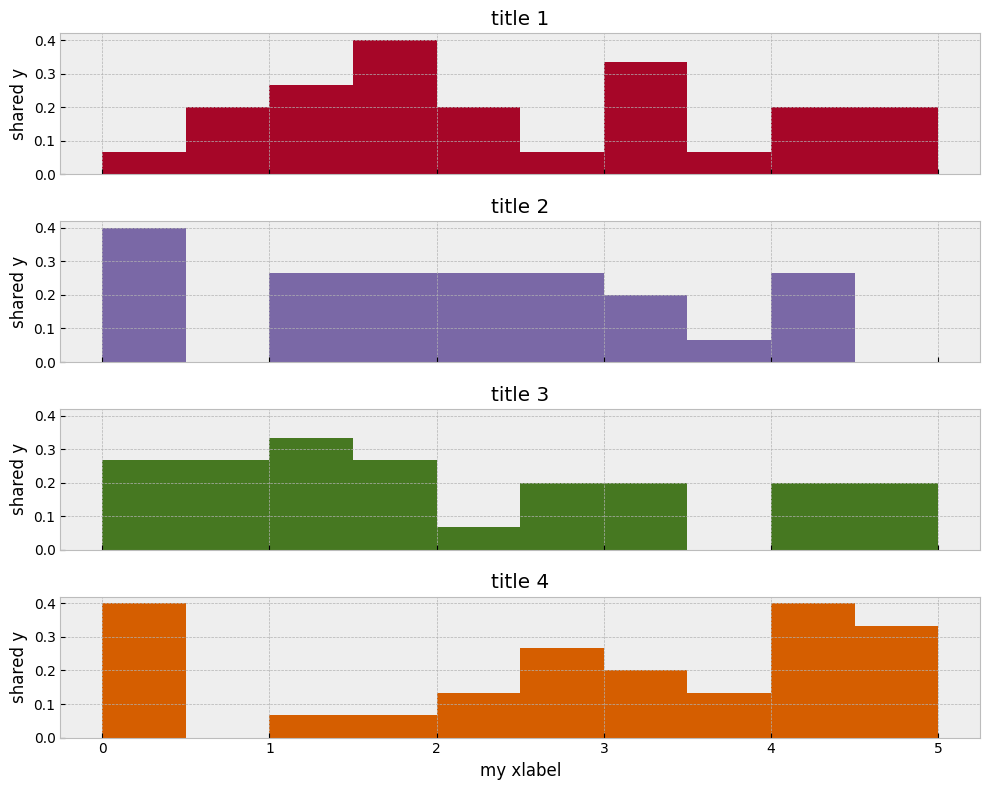

PyObject Text(0.5, 28.0, 'my xlabel')

In [6]:
# pre-specify bins for each plot
bins = range(0.0, 5.0, length=11)

fig, axs = subplots(4, 1, figsize=(10, 8), 
                    sharex=true, sharey=true, tight_layout=true)
for i = 1:4
    axs[i].hist(5 * rand(30), color="C$i", bins=bins, normed=true)
    axs[i].set_title("title $i")
    axs[i].set_ylabel("shared y")
end
xlabel("my xlabel")